In [1]:
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.stattools import jarque_bera
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import truncnorm
from scipy import stats
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
import scipy.stats as st


# 1.1

In [2]:
mu = 0
sigma = 1
deg_freedom = 5
trials = 1000
sample_size = 500

In [3]:
normal = np.random.normal(mu, sigma, sample_size)
laplace = np.random.laplace(mu, sigma, sample_size)
student = np.random.standard_t(deg_freedom, size=sample_size)
trunc_norm = truncnorm.rvs(-2, 2, size=sample_size)

### Lilliefors

In [4]:
power_lilliefors = {}

In [5]:
reject = 0
for i in range(trials):
    laplace = np.random.laplace(mu, sigma, size=sample_size)
    _, p = lilliefors(laplace)
    if p < 0.05:
        reject += 1
power_lilliefors['laplace'] = reject/trials
power_lilliefors['laplace']

1.0

In [6]:
reject = 0
for i in range(trials):
    student = np.random.standard_t(deg_freedom, size=sample_size)
    _, p = lilliefors(student)
    if p < 0.05:
        reject += 1
power_lilliefors['student'] = reject/trials
power_lilliefors['student']

0.908

In [7]:
reject = 0
for i in range(trials):
    trunc_norm = truncnorm.rvs(-2, 2, size=sample_size)
    _, p = lilliefors(trunc_norm)
    if p < 0.05:
        reject += 1
power_lilliefors['trunc_norm'] = reject/trials
power_lilliefors['trunc_norm']

0.209

In [8]:
reject = 0
for i in range(trials):
    normal = np.random.normal(mu, sigma, sample_size)
    _, p = lilliefors(normal)
    if p < 0.05:
        reject += 1
power_lilliefors['normal'] = reject/trials
power_lilliefors['conservative'] = reject/trials <= 0.05
power_lilliefors['normal']

0.054

### Jarke-Bera

In [9]:
power_jarque_bera = {}

In [10]:
reject = 0
for i in range(trials):
    laplace = np.random.laplace(10, size=sample_size)
    _, p, _, _ = jarque_bera(laplace)
    if p < 0.05:
        reject += 1
power_jarque_bera['laplace'] = reject/trials
power_jarque_bera['laplace']

1.0

In [11]:
reject = 0
for i in range(trials):
    student = np.random.standard_t(deg_freedom, size=sample_size)
    _, p, _, _ = jarque_bera(student)
    if p < 0.05:
        reject += 1
power_jarque_bera['student'] = reject/trials
power_jarque_bera['student']

0.993

In [12]:
reject = 0
for i in range(trials):
    trunc_norm = truncnorm.rvs(-2, 2, size=sample_size)
    _, p, _, _ = jarque_bera(trunc_norm)
    if p < 0.05:
        reject += 1
power_jarque_bera['trunc_norm'] = reject/trials
power_jarque_bera['trunc_norm']

0.894

In [13]:
reject = 0
for i in range(trials):
    normal = np.random.normal(mu, sigma, sample_size)
    _, p, _, _ = jarque_bera(normal)
    if p < 0.05:
        reject += 1
power_jarque_bera['normal'] = reject/trials
power_jarque_bera['conservative'] = reject/trials <= 0.05
power_jarque_bera['normal']

0.047

### Shapiro

In [14]:
power_shapiro = {}

In [15]:
reject = 0
for i in range(trials):
    laplace = np.random.laplace(mu, sigma, size=sample_size)
    _, p = stats.shapiro(laplace)
    if p < 0.05:
        reject += 1
power_shapiro['laplace'] = reject/trials
power_shapiro['laplace']

1.0

In [16]:
reject = 0
for i in range(trials):
    student = np.random.standard_t(deg_freedom, size=sample_size)
    _, p = stats.shapiro(student)
    if p < 0.05:
        reject += 1
power_shapiro['student'] = reject/trials
power_shapiro['student']

0.986

In [17]:
reject = 0
for i in range(trials):
    trunc_norm = truncnorm.rvs(-2, 2, size=sample_size)
    _, p = stats.shapiro(trunc_norm)
    if p < 0.05:
        reject += 1
power_shapiro['trunc_norm'] = reject/trials
power_shapiro['trunc_norm']

0.997

In [18]:
reject = 0
for i in range(trials):
    normal = np.random.normal(mu, sigma, sample_size)
    _, p = stats.shapiro(normal)
    if p < 0.05:
        reject += 1
power_shapiro['normal'] = reject/trials
power_shapiro['conservative'] = reject/trials <= 0.05
power_shapiro['normal']

0.064

В таблице ниже представлены мощности для выборок из распределений Лапласа, Стьюдента и Усеченного нормального, а также консеравтивность для нормального при размере выборки = 500. Мы проверяем консервативность для нормального, так как все три критерия это критерии проверки на нормальность.

In [19]:
pd.DataFrame(data={'lilliefors':power_lilliefors, 'jarque_bera': power_jarque_bera, 'shapiro': power_shapiro})

,lilliefors,jarque_bera,shapiro
laplace,1,1,1
student,0.908,0.993,0.986
trunc_norm,0.209,0.894,0.997
normal,0.054,0.047,0.064
conservative,False,True,False


Посмотрим как меняется консервативность критериев в зависимости от размера выборки.

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(Ss, conserv_JB, label = 'jarque_bera')
plt.plot(Ss, conserv_Shap, label = 'shapiro')
plt.plot(Ss, conserv_Lil, label = 'lilliefors')
plt.axhline(0.05, color = 'red')
plt.grid()
plt.legend()conserv_JB = []
conserv_Shap = []
conserv_Lil = []
Ss = np.arange(500, 15000, 500)
for ss in Ss:
    reject_JB, reject_Shap, reject_Lil = 0, 0, 0
    for i in range(trials):
        normal = np.random.normal(mu, sigma, ss)
        _, p_JB, _, _ = jarque_bera(normal)
        _, p_Shap = stats.shapiro(normal)
        _, p_Lil = st.kstest(normal, 'norm')
        if p_JB < 0.05: reject_JB += 1
        if p_Shap < 0.05: reject_Shap += 1
        if p_Lil < 0.05: reject_Lil += 1
    conserv_JB.append(reject_JB/trials)
    conserv_Shap.append(reject_Shap/trials)
    conserv_Lil.append(reject_Lil/trials)

/usr/local/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



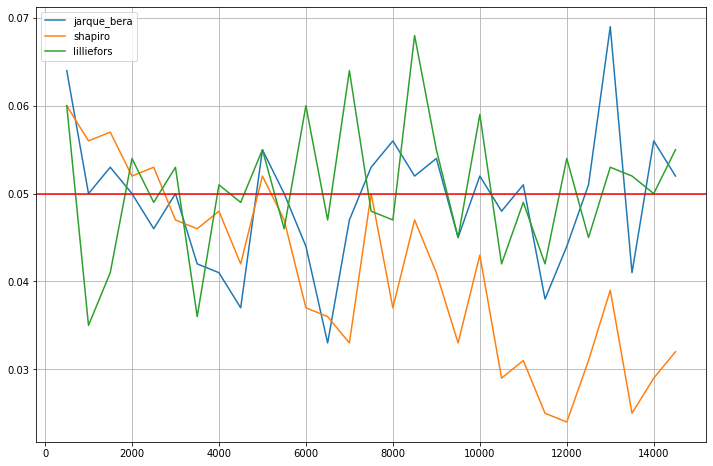

In [77]:
plt.figure(figsize=(12, 8))
plt.plot(Ss, conserv_JB, label = 'jarque_bera')
plt.plot(Ss, conserv_Shap, label = 'shapiro')
plt.plot(Ss, conserv_Lil, label = 'lilliefors')
plt.axhline(0.05, color = 'red')
plt.grid()
plt.legend()

Критерий Шапиро-Уилка почти всегда консервативен при размерах выбрки больше 3000 и ведет себя в целом лучше всего среди остальных: $p_val$ для него более менее монотонно уменьшается с увеличением размера выборки. Критерий Лиллиефорса показывает себя лучше при размерах выборки меньше 2000.
